# The Official file for doing ARIMA

This file is intended to be created to do mass ARIMA for building these models for all the mice. The code should be made into clean, encapsulated functions which are easy to use and are repeateable to analysis can be done quickly and efficiently.

In [6]:
# upload data
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

def to_datetime(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df.set_index('DateTime',inplace=True)
    return df

mouse_df_list = list()

# pull 16 mice PCA data
for i in range(1,17):
    df = pd.read_excel("data/originalVars/{}.xlsx".format(i))
    mouse_df_list.append(df)


# create array that will hold all graphs
graphs = []
for mouse in mouse_df_list:
    # create mouse array and iterate through 13 variables
    mouseN = []
    for i in range(13):
        dfAti = pd.DataFrame(mouse.iloc[:, i])
        dfAti.insert(0, 'DateTime', mouse['DateTime'])
        dfAti = to_datetime(dfAti)
        mouseN.append(dfAti)
    graphs.append(mouseN)

print(len(graphs))
print(len(mouseN))
dfAti


16
13


,Stilltime_M
DateTime,
2022-11-04 14:01:00,15.44444
2022-11-04 14:31:00,0.00000
2022-11-04 15:01:00,26.77778
2022-11-04 15:31:00,19.27778
2022-11-04 16:01:00,8.00000
...,...
2022-11-28 06:01:00,38.00000
2022-11-28 06:31:00,86.61111
2022-11-28 07:01:00,82.27778


In [7]:
# create functions

# pick a mouse from 1 to 16
MOUSE_NUMBER = 1

# pick a index variable: 1 VO2_M, 2 VCO2_M, 3 VH2O_M, 4 kcal_hr_M, 5 RER_M, 6 FoodInA_M, 7 WaterInA_M, 8 BodyMass_M, 9 PedSpeed_Mnz, 10 PedMeters_M, 11 PedMeters_R, 12 AllMeters_M, 13 Stilltime_M
VARIABLE = 7

# measured in amount of days wanted for the test dataset vs the training dataset
# 23.x days, will create TEST_SIZE + 0.x days for test dataset and 23.x - TEST_SIZE.x for training dataset
TEST_SIZE = 2


In [8]:
mouse_index = MOUSE_NUMBER - 1
var_index = VARIABLE - 1
df = graphs[mouse_index][var_index]

# change values to numerical values
df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0])
df

,WaterInA_M
DateTime,
2022-11-04 14:01:00,0.000000
2022-11-04 14:31:00,0.001894
2022-11-04 15:01:00,0.011358
2022-11-04 15:31:00,0.073106
2022-11-04 16:01:00,0.214622
...,...
2022-11-28 06:01:00,66.111400
2022-11-28 06:31:00,66.111400
2022-11-28 07:01:00,66.111400


<Axes: xlabel='DateTime'>

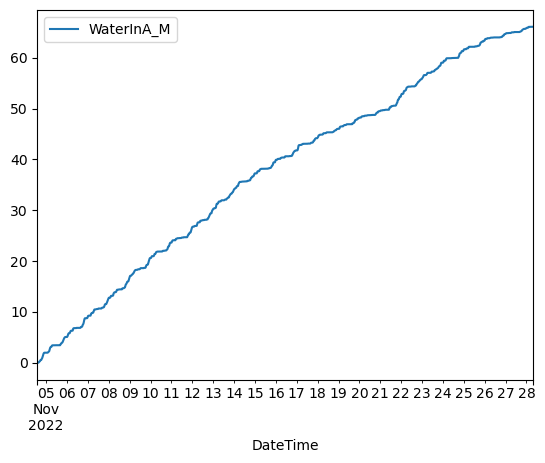

In [15]:
df.plot()

In [14]:
# run differencing, will output the desired d value at the end
# stationarity inspection using augmented Dickey-Fuller(ADF) test

# difference() function? https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/
from statsmodels.tsa.stattools import adfuller

def is_stationary(data):
    result = adfuller(data)
    if result[1] > 0.05:
        return False
    return True

difference = 0

while not is_stationary(df):
    df = df.diff().dropna()
    difference += 1
    if difference > 10:
        raise Exception("Warning: difference over 10")
    
difference



(-3.12597878176186, 0.024689428841573314, 8, 1132, {'1%': -3.436139921033549, '5%': -2.86409660029079, '10%': -2.568131202693254}, -2577.53920325005)


0

In [10]:
# split data into train and test sets

TEST_SIZE = 133
train, test = df.iloc[:-TEST_SIZE], df.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], df.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((1008, 1), (1008,), (133, 1), (133,))

In [11]:
# run auto arima

In [12]:
# calculate SMAPE, conclusion